# Homework 2
Section 8.2

Math 404

Winter 2020

<Name> Ethan Williams

In [5]:
import numpy as np

## Exercise 8.6
Begin implementing a ``LinearModel`` class for the special case where the control model $G_k = I$, is trivial, and all but the state and the observation are constant, that is, where $F_k = F$, $H_k = H$, $P_k = P$, $Q_k = Q$, and $\mathbf{u}_k = \mathbf{u}$ are all constant, by writing an initialization method that stores the transition and observation models, noise covariances, and control vector.

In [1]:
class LinearModel(object):
    def __init__(self, F, Q, H, R, u):
        """
        Initialize the dynamical system models.
        
        Parameters
        ----------
        F : ndarray of shape (n,n)
            The state transition model.
        Q : ndarray of shape (n,n)
            The covariance matrix for the state noise.
        H : ndarray of shape (m,n)
            The observation model.
        R : ndarray of shape (m,m)
            The covariance matric for observation noise.
        u : ndarray of shape (n,)
            The control vector.
        """
        self.F = F
        self.Q = Q
        self.H = H
        self.R = R
        self.u = u

## Exercise 8.7
Add a method to your ``LinearModel`` class to generate a state and observation
sequence by evolving the system from a given initial state (the function ``numpy
.random.multivariate_normal`` will be useful). To do this, implement the
following:

In [14]:
#Inherit from previously defined class.
#Give child class the same name.
class LinearModel(LinearModel):
    
    #Now it's like you're writing additional methods for the same class.
    
    def evolve(self,x0,N):
        """
        Compute the first N states and observations generated by the linear system.

        Parameters
        ----------
        x0 : ndarray of shape (n,)
            The initial state.
        N : integer
            The number of time steps to evolve.

        Returns
        -------
        states : ndarray of shape (n,N)
            States 0 through N-1, given by each column.
        obs : ndarray of shape (m,N)
            Observations 0 through N-1, given by each column.
        """
        xk0 = x0
        observations = []
        states = []
        for step in range(N):
            xk1 = self.F@xk0 + self.u + np.random.multivariate_normal(np.array([0,0,0,0]),self.Q)
            obs = self.H@xk0 + np.random.multivariate_normal(np.array([0,0]),self.R)
            observations.append(obs)
            states.append(xk1)
            xk0 = xk1
        return np.array(states),np.array(observations)
            


## Exercise 8.8
Instantiate your ``LinearModel`` class for a projectile as in Example 8.2.6. Assume
the time step is $\Delta_t = 0.1s$, and the model variance is $Q_k = Q = 0.1I_4$
for all $k \in \mathbb{N}$. Let the observation error be $R_k = R = 5000I_2$.

Use the ``evolve`` method to simulate the true state and observed trajectory of
the projectile, beginning with initial state
$$
\mathbf{x}_0
=
\begin{pmatrix}
    0\\
    0\\
    300\\
    600
\end{pmatrix}.
$$
Approximately 1250 time steps should be sufficient for the projectile to hit
the ground (i.e. for the $y$ coordinate to return to 0). Your results should
qualitatively match those given in Figure 8.2.

In [15]:
Q = np.eye(4)*.1
R = np.eye(2)*5000
F = np.eye(4)
F[0,2],F[1,3] = 0.1,0.1
u = np.array([0,0,0,-.98])
H = np.array([[1,0,0,0],[0,1,0,0]])

x0 = np.array([0,0,300,600])
projectile = LinearModel(F, Q, H, R, u)
states,observations = projectile.evolve(x0,1250)

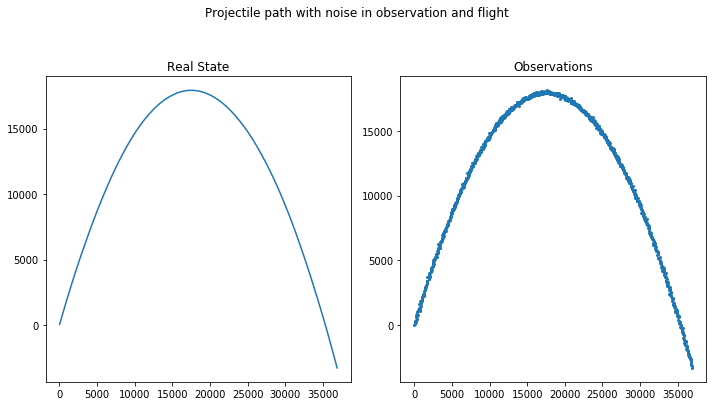

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(122)
plt.title("Observations")
plt.scatter([x[0] for x in observations],[x[1] for x in observations],s = 4)
plt.subplot(121)
plt.title("Real State")
plt.plot([x[0] for x in states],[x[1] for x in states])
plt.suptitle("Projectile path with noise in observation and flight",y=1.12)
plt.tight_layout()
plt.show()